In [2]:
"""
import modules
"""

from prepare_data import prepare_df_from_mac_5_year as prepare_CCL
from prepare_data import prepare_paths as prepare_paths
from emulate_reduction import emulator_v4 as emulate
from visualize_output import vis_emulator_v1 as v1_plot
from pym import pym

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import os

dir(prepare_paths)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'colors',
 'combine_azure_ctax',
 'np',
 'os',
 'output_costs_timer',
 'pd',
 'plot_MAC',
 'plt',
 'prepare_data',
 'pym',
 'truncate_colormap',
 'world_MAC_data',
 'world_emulator_data']

In [281]:
"""
IAMC database 
"""

FILENAME_IAMC = 'iamc15_scenario_data_world_r2.0.xlsx'
FILENAME_MEAN_TEMP = 'mean_temp.csv'

PATH_IAMC = 'C:/Users/toonv/Documents/PBL/Data/IAMC_paths/'
PATH_IAMC_MYM = 'C:/Users/toonv/Documents/PBL/Data/IAMC_paths_mym/'
PATH_IAMC_CSV = 'C:/Users/toonv/Documents/PBL/Data/IAMC_paths_csv/'
PATH_RANDOM_SCALED = 'C:/Users/toonv/Documents/PBL/Data/random_scaled_mym/'
SCALED_COSTCHECK = 'C:/Users/toonv/Documents/PBL/Data/scaled_cost_mym/'
COSTCHECK = 'C:/Users/toonv/Documents/PBL/Data/cost_mym/'

# new paths, from IAMC databese
# IAMC_database = pd.read_excel(PATH_IAMC + FILENAME_IAMC, sheet_name='data')
costcheck_paths = pd.read_excel('C:/Users/toonv/Documents/PBL/Data/test_paths_costs.xlsx',
                               index_col=0, header=0)

C:\Users\toonv\Documents\PBL\Code\Emulator\prepare_data\prepare_paths.py:262: RuntimeWarning: invalid value encountered in true_divide
  norm_ctax = self.values_only.values / self.final_ctax[:, None]


295


C:\Users\toonv\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
C:\Users\toonv\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
C:\Users\toonv\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
C:\Users\toonv\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
C:\Users\toonv\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: MatplotlibD

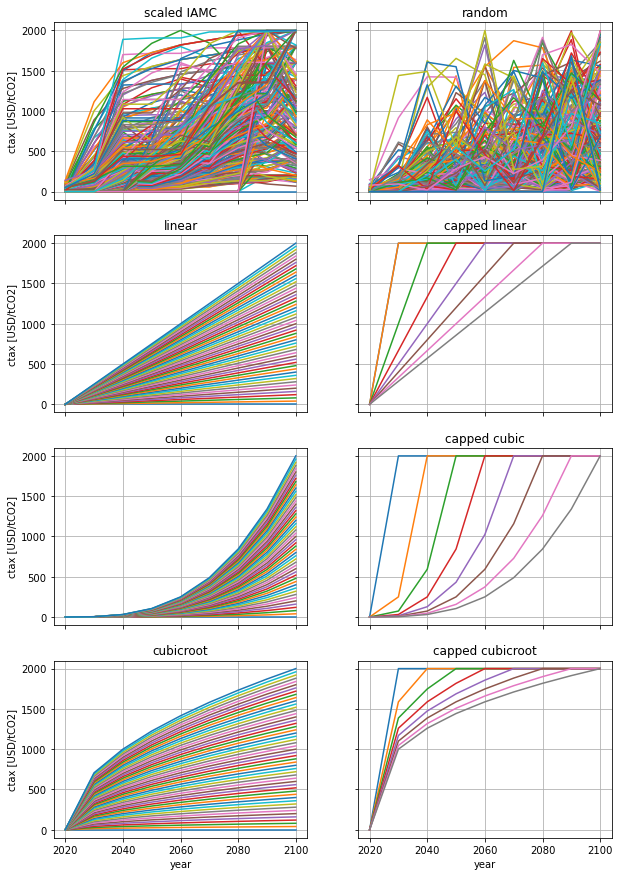

In [294]:
"""
prepare data from IAMC database
"""

reload(prepare_paths)

YEAR_STEP = 10
MAX_CTAX = 2000
MODELS = ['IMAGE']
STEP_CTAX = 200
STEP_CTAX_LIN_PATHS = 40
MAX_RAND = 2

raw_data = prepare_paths.prepare_data(IAMC_database)

carbon_prices, models_ctax = raw_data.filter_iamc(YEAR_STEP, 'Price|Carbon', MAX_CTAX, MODELS)
# mean_temp, models_temp = raw_data.filter_iamc(year_step, 'AR5 climate diagnostics|Temperature|Global Mean|MAGICC6|MED',
#                                               MAX_CTAX, MODELS)

# scaled and lin ctax
scaled_ctax_paths = raw_data.scale_ctax(STEP_CTAX)
lin_ctax_paths = raw_data.get_linear(MAX_CTAX, STEP_CTAX_LIN_PATHS)
sparse_ctax_paths = raw_data.sparse_linear(MAX_CTAX)
random_ctax_paths = raw_data.get_random(MAX_RAND, MAX_CTAX)
cubic_ctax_paths = raw_data.get_cubic(MAX_CTAX)
cubicroot_ctax_paths = raw_data.get_cubicroot(MAX_CTAX)
sparse_cubicroot_paths = raw_data.sparse_cubicroot(MAX_CTAX)
sparse_cubic_paths = raw_data.sparse_cubic(MAX_CTAX)
# scaled_random = raw_data.scaled_random(STEP_CTAX_LIN_PATHS)

scaled_cost_paths = prepare_paths.scale_ctax(costcheck_paths, MAX_CTAX)
# merged dataframe
# all_paths = raw_data.merge_all(PATH_IAMC, 'all_ctax_paths_test_1.xlsx')
# print(len(all_paths))
# raw_data.plot_ctax_paths(lin_ctax_paths, colormap=None)

ctaxes = [scaled_ctax_paths, random_ctax_paths, lin_ctax_paths, sparse_ctax_paths, cubic_ctax_paths, sparse_cubic_paths,
         cubicroot_ctax_paths, sparse_cubicroot_paths]

for index, ctax in enumerate(ctaxes):
    
    rows = len(ctaxes)/2
    
    plt.subplot(rows,2,index + 1)
    
    ctax.T.plot(legend=False, ax=plt.gca(), sharex=True, sharey=True, title=ctax.method, grid=True,
               figsize=(10,15), ylabel='ctax [USD/tCO2]', xlabel='year')

# save data to path
raw_data.prepare_mym(scaled_cost_paths, SCALED_COSTCHECK, PATH_IAMC_CSV, 'ctax_train_')


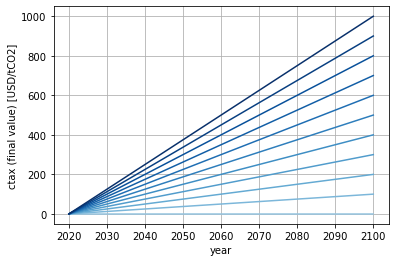

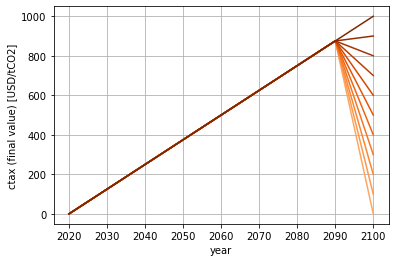

In [92]:
"""
Dataframe for costs experiment
"""

MAX_CTAX_COSTS = 1000
STEP_CTAX_COSTS = 100
LIN_PATH_COSTS = 'C:/Users/toonv/Documents/PBL/Data/paths_costs/lin_paths'
TREE_PATH_COSTS = 'C:/Users/toonv/Documents/PBL/Data/paths_costs/tree_paths'
PATH_COSTS_CSV = 'C:/Users/toonv/Documents/PBL/Data/costs_paths_csv/'

lin_ctax_paths_costs = raw_data.get_linear(MAX_CTAX_COSTS, STEP_CTAX_COSTS)
raw_data.plot_ctax_paths(lin_ctax_paths_costs, 'Blues')

tree_ctax_paths_costs = raw_data.get_tree_costs(MAX_CTAX_COSTS, STEP_CTAX_COSTS)
raw_data.plot_ctax_paths(tree_ctax_paths_costs, 'Oranges')

# raw_data.prepare_mym(lin_ctax_paths_costs, LIN_PATH_COSTS, PATH_COSTS_CSV, 'ctax_train_')
# raw_data.prepare_mym(tree_ctax_paths_costs, TREE_PATH_COSTS, PATH_COSTS_CSV, 'ctax_train_')



Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64')


,1,2,3,4,5,6,7,8,9,10,11,12
3920,1.193379,1.193379,1.193379,1.193379,1.173546,1.193379,1.188475,1.177075,1.193379,1.193379,1.189612,1.193379
3940,1.193473,1.193473,1.193473,1.193473,1.173602,1.193473,1.188560,1.177137,1.193473,1.193473,1.189699,1.193473
3960,1.193566,1.193566,1.193566,1.193566,1.173724,1.193566,1.188660,1.177254,1.193566,1.193566,1.189797,1.193566
3980,1.193738,1.193738,1.193738,1.193738,1.173946,1.193738,1.188845,1.177467,1.193738,1.193738,1.189979,1.193738
4000,1.193952,1.193952,1.193952,1.193952,1.174329,1.193952,1.189100,1.177820,1.193952,1.193952,1.190225,1.193952


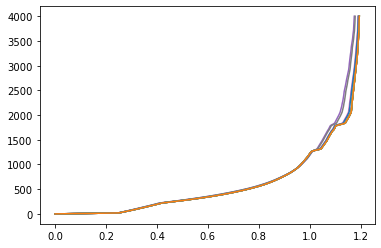

In [286]:
"""
prepare data from FAIR
"""
# costcheck_FAIR_1 = pd.read_table('C:/Users/toonv/Documents/PBL/Data/costcheck_FAIR/costcurveCO2_rel_1',
#                                sep = ',', skiprows=1, header=None)
# costcheck_FAIR_2 = pd.read_table('C:/Users/toonv/Documents/PBL/Data/costcheck_FAIR/costcurveCO2_rel_2',
#                                sep = ',', skiprows=1, header=None)
# costcheck_FAIR_3 = pd.read_table('C:/Users/toonv/Documents/PBL/Data/costcheck_FAIR/costcurveCO2_rel_3',
#                                sep = ',', skiprows=1, header=None)
# costcheck_FAIR_4 = pd.read_table('C:/Users/toonv/Documents/PBL/Data/costcheck_FAIR/costcurveCO2_rel_4',
#                                sep = ',', skiprows=1, header=None)
# costcheck_FAIR_5 = pd.read_table('C:/Users/toonv/Documents/PBL/Data/costcheck_FAIR/costcurveCO2_rel_5',
#                                sep = ',', skiprows=1, header=None)
# costcheck_FAIR_6 = pd.read_table('C:/Users/toonv/Documents/PBL/Data/costcheck_FAIR/costcurveCO2_rel_6',
#                                sep = ',', skiprows=1, header=None)

costcheck_FAIR = [f'costcurveCO2_rel_{i+1}' for i in range(12)]
year = 2100

def prepare_FAIR(year, df):
    df = df[0]
    index_2100 = df[df[df==2100]]
    costcheck_2100 = df[(df[df == 2100].index.values[0] + 1):len(df)]

    index_for_world = range(26, len(costcheck_2100), 27)
    costcheck_2100_world = costcheck_2100.iloc[index_for_world].reset_index(drop=True)
    costcheck_2100_world = costcheck_2100_world.astype(float)
    ctaxes = range(0,4020,20)

    costcheck_df = pd.DataFrame(costcheck_2100_world)     
#     costcheck_df['ctax'] = ctaxes
    plt.plot(costcheck_2100_world, ctaxes)

    return costcheck_df

costcheck_FAIR_tot = pd.DataFrame()

for df in costcheck_FAIR:
    with open('C:/Users/toonv/Documents/PBL/Data/costcheck_FAIR/' + df, 'r') as file: 
        test = pd.read_table(file, sep = ',', skiprows=1, header=None)
        costcheck_FAIR_tot = pd.concat([costcheck_FAIR_tot, 
                                       prepare_FAIR(year, test)], axis=1)
        
costcheck_FAIR_tot.index = range(0,4020,20)
costcheck_FAIR_tot.columns = [int(i+1) for i in range(12)]
costcheck_FAIR_tot.to_csv('C:/Users/toonv/Documents/PBL/Data/costcheck_FAIR/costcheck_FAIR_tot.csv')
print(costcheck_FAIR_tot.columns)
costcheck_FAIR_tot.tail()
